In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
import numpy as np
from collections import OrderedDict
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

In [69]:
data = pd.read_csv('../datasets/OIE_data.csv')
 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientnumber                  305 non-null    object 
 1   malclass                       305 non-null    object 
 2   PTH                            305 non-null    int64  
 3   age                            305 non-null    int64  
 4   sex                            305 non-null    object 
 5   Ethnicity                      305 non-null    object 
 6   Groups                         295 non-null    object 
 7   Symptombeginn                  285 non-null    float64
 8   Pittingquote_absolut_modified  145 non-null    float64
 9   Pittingquote_modified          145 non-null    float64
 10  Immunity                       195 non-null    object 
 11  [iE]                           61 non-null     float64
 12  parasitemia                    61 non-null     flo

In [70]:
ic(data.columns)
data.info()

ic| data.columns: Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
                         'Symptombeginn', 'Pittingquote_absolut_modified',
                         'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
                         'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
                         'R_percent', '[R]', 'RPI', 'time', 'patient_id'],
                        dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientnumber                  305 non-null    object 
 1   malclass                       305 non-null    object 
 2   PTH                            305 non-null    int64  
 3   age                            305 non-null    int64  
 4   sex                            305 non-null    object 
 5   Ethnicity                      305 non-null    object 
 6   Groups                         295 non-null    object 
 7   Symptombeginn                  285 non-null    float64
 8   Pittingquote_absolut_modified  145 non-null    float64
 9   Pittingquote_modified          145 non-null    float64
 10  Immunity                       195 non-null    object 
 11  [iE]                           61 non-null     float64
 12  parasitemia                    61 non-null     flo

ic| np.nanmedian(data[data['PTH']==0]['parasitemia']): 0.4
ic| np.nanmedian(data[data['PTH']==1]['parasitemia']): 1.0
ic| np.nanmedian(data[data['PTH']==0]['[iE]']): 17850.0
ic| np.nanmedian(data[data['PTH']==1]['[iE]'])

: 57000.0


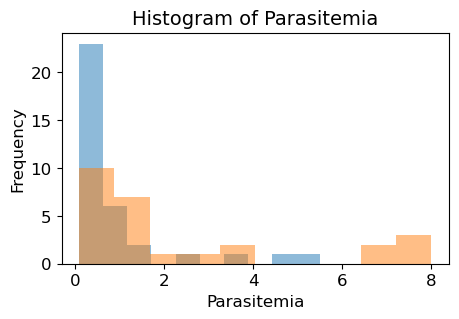

In [71]:
fig, ax = plt.subplots(figsize = (5, 3))

ax.hist(data[data['PTH']==0]['parasitemia'], bins=10, alpha=0.5, label='PTH=0')
ax.hist(data[data['PTH']==1]['parasitemia'], bins=10, alpha=0.5, label='PTH=1') 
ic(np.nanmedian(data[data['PTH']==0]['parasitemia']))
ic(np.nanmedian(data[data['PTH']==1]['parasitemia']))

ic(np.nanmedian(data[data['PTH']==0]['[iE]']))
ic(np.nanmedian(data[data['PTH']==1]['[iE]']))

ax.set_xlabel('Parasitemia')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Parasitemia')
plt.show()  

ic| np.nanmedian(data[data['PTH']==0]['Symptombeginn']): 3.0
ic| np.nanmedian(data[data['PTH']==1]['Symptombeginn']): 5.0


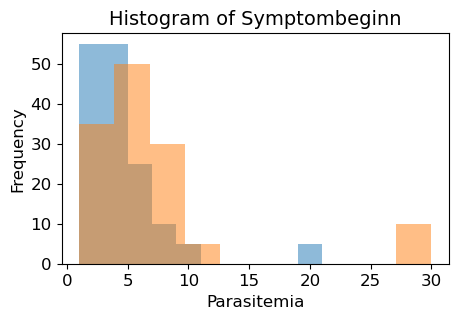

In [72]:
fig, ax = plt.subplots(figsize = (5, 3))

ax.hist(data[data['PTH']==0]['Symptombeginn'], bins=10, alpha=0.5, label='PTH=0')
ax.hist(data[data['PTH']==1]['Symptombeginn'], bins=10, alpha=0.5, label='PTH=1') 

ic(np.nanmedian(data[data['PTH']==0]['Symptombeginn']))
ic(np.nanmedian(data[data['PTH']==1]['Symptombeginn']))
ax.set_xlabel('Parasitemia')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Symptombeginn')
plt.show()  

In [73]:
def extract_patient(data: pd.DataFrame, patient_id: int) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    return patient_df

def list_patients(data: pd.DataFrame) -> list:
    patients = data['patient_id'].unique()
    return patients

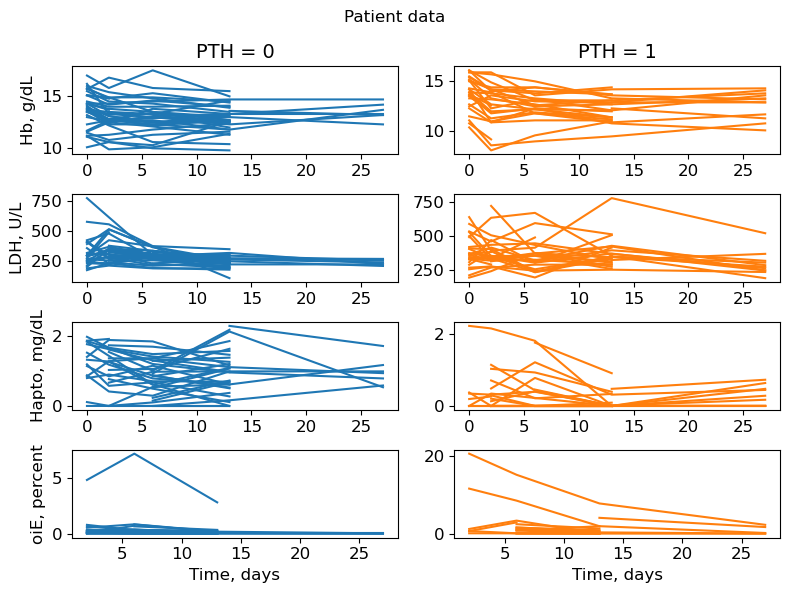

In [74]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(data):
    patient_df = extract_patient(data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

## Normalize values for entire feature

Entire feature vector (e.g. Hb) is normalized over all patients and timepoints, i.e. feature difference between patient persists

In [75]:
def normalize_hb(data: pd.DataFrame):
    data['Hb_norm'] = (data['Hb'] - data['Hb'].mean()) / data['Hb'].std()
    return data

def normalize_ldh(data: pd.DataFrame):
    data['LDH_norm'] = (data['LDH'] - data['LDH'].mean()) / data['LDH'].std()
    return data 

def normalize_hapto(data: pd.DataFrame):
    data['Hapto_norm'] = (data['Hapto'] - data['Hapto'].mean()) / data['Hapto'].std()
    return data 


def normalize_oie(data: pd.DataFrame):
    data['oiE_percent_norm'] = (data['oiE_percent'] - data['oiE_percent'].mean()) / data['oiE_percent'].std()
    return data 

def normalyize_data(data: pd.DataFrame):
    data = normalize_hb(data)
    data = normalize_ldh(data)
    data = normalize_hapto(data)
    data = normalize_oie(data)  
    return data 

In [76]:
n_data = normalyize_data(data)

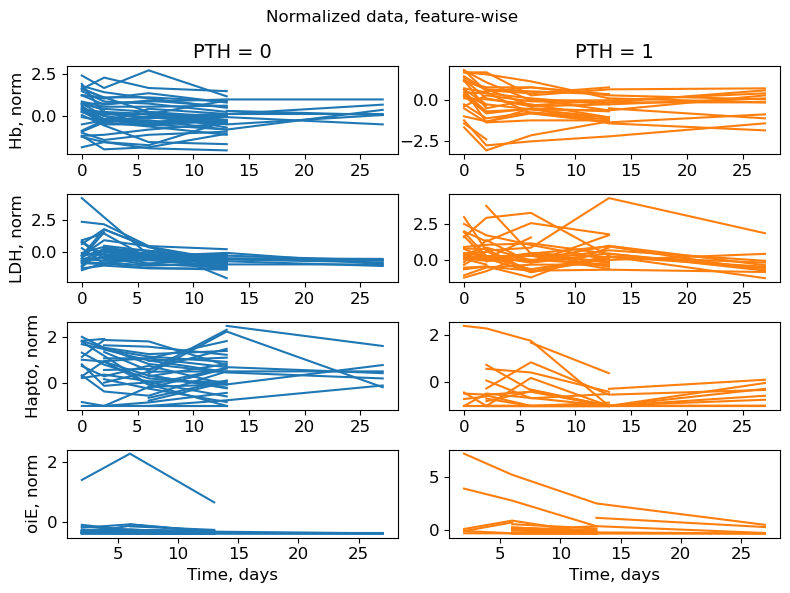

In [77]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
fig.suptitle('Normalized data, feature-wise ')
plt.tight_layout()
plt.show()

## Normalize features per patient

Here each features is normalized for each patient/individually

In [78]:
# Define a function to calculate normalized Hb values
def calculate_normalized_feat(patient_data, feature: str):
    mean_feat = patient_data[feature].mean()
    std_feat = patient_data[feature].std()
    normalized_feat = (patient_data[feature] - mean_feat)/std_feat
    return normalized_feat

def normalize_data_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_norm_ind'] = calculate_normalized_feat(patient_df, feature        )
    return data

In [79]:
n_data_ind = normalize_data_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])

In [80]:
n_data_ind.tail()

,patientnumber,malclass,PTH,age,sex,Ethnicity,Groups,Symptombeginn,Pittingquote_absolut_modified,Pittingquote_modified,...,time,patient_id,Hb_norm,LDH_norm,Hapto_norm,oiE_percent_norm,Hb_norm_ind,LDH_norm_ind,Hapto_norm_ind,oiE_percent_norm_ind
300,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,0,60.0,-1.667176,1.573407,NaN,NaN,0.497880,-0.317615,NaN,NaN
301,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,2,60.0,-3.094534,2.903667,-1.033786,NaN,-1.334319,0.668205,NaN,NaN
302,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,6,60.0,-2.163648,3.240915,-1.033786,0.526260,-0.139406,0.918132,NaN,0.707107
303,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,13,60.0,-1.294821,0.289988,-1.033786,0.117217,0.975845,-1.268723,NaN,-0.707107
304,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,27,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


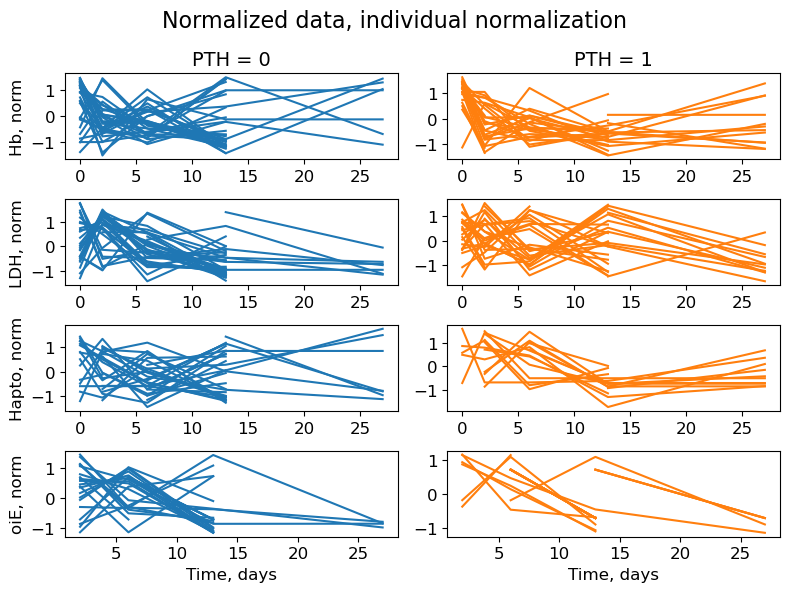

In [81]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm_ind'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm_ind'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm_ind'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm_ind'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Normalized data, individual normalization', fontsize=16)
plt.tight_layout()
plt.show()

## Min-max scaling per patient

In [82]:
# Define a function to calculate normalized Hb values
def calculate_minmax_feat(patient_data, feature: str):
    max_feat = patient_data[feature].max()
    min_feat = patient_data[feature].min()
    normalized_feat = (patient_data[feature] - min_feat)/(max_feat-min_feat)
    return normalized_feat

def normalize_data_minmax_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_minmax_ind'] = calculate_minmax_feat(patient_df, feature        )
    return data

In [83]:
n_data = normalize_data_minmax_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent','[R]','[E]'])   

In [84]:
def get_stats_of_feature(data: pd.DataFrame, feature: str, pth: int = 0):
    pth_data = data[data['PTH'] == pth]
    feature_array = pth_data[feature].values
    f_reshaped = feature_array.reshape(len(feature_array)//5 , 5)
    
    mean_feature = np.nanmean(f_reshaped, axis=0)
    median_feature = np.nanmedian(f_reshaped, axis=0)  
    std_feature = np.nanstd(f_reshaped, axis=0,ddof=1)
    sem_feature = std_feature/np.sqrt(len(f_reshaped))
    percentile_25, percentile_75 = np.nanpercentile(f_reshaped, [25, 75], axis=0)


    return mean_feature, median_feature, std_feature, percentile_25, percentile_75, sem_feature  

/tmp/ipykernel_6655/3177712597.py:6: RuntimeWarning: Mean of empty slice
  mean_feature = np.nanmean(f_reshaped, axis=0)
/tmp/ipykernel_6655/3177712597.py:7: RuntimeWarning: All-NaN slice encountered
  median_feature = np.nanmedian(f_reshaped, axis=0)
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


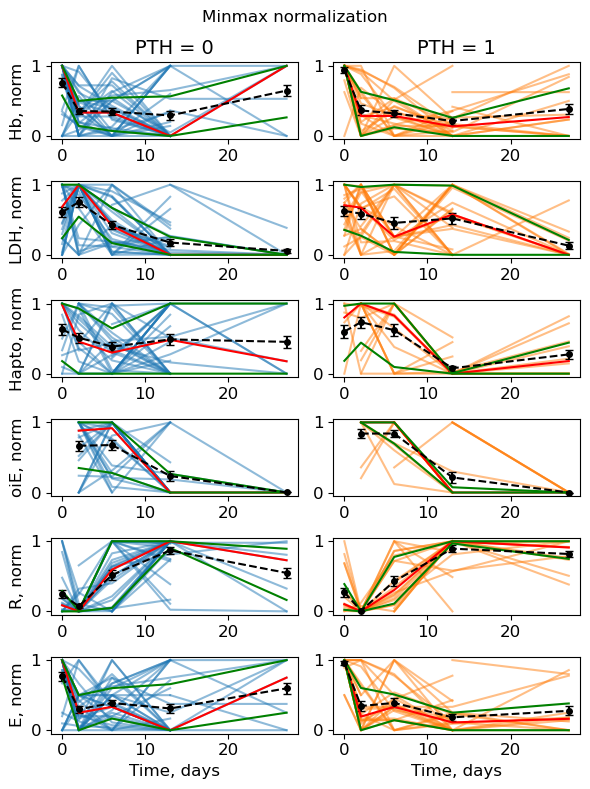

In [85]:
feature_list =['Hb_minmax_ind','LDH_minmax_ind','Hapto_minmax_ind','oiE_percent_minmax_ind','[R]_minmax_ind','[E]_minmax_ind']

fig , ax = plt.subplots(len(feature_list),2 , figsize = (6, 8))
for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    for j,feature in enumerate(feature_list):
        ax[j, pth].plot(patient_df['time'], patient_df[feature], label = patient, color=color, alpha=0.5)

stats_order = ['Mean', 'Median', 'Std', 'Percentile_25', 'percentile_75', "SEM"]
color_list = ['black', 'red', 'blue', 'green', 'green', 'navy']

for pth in (0,1):
    for i in range(len(feature_list)):
        stats = get_stats_of_feature(n_data, feature_list[i], pth=pth)   
        for j, name in enumerate(stats_order):
            if name in ['Std','SEM']:continue
            k=-1 #std =2, sem =-1
            yerr = [stats[k], # 'down' error
                    stats[k]]  # 'up' error
            if name =='Mean':
                ax[i,pth].errorbar(patient_df['time'], stats[j], label = stats_order[j]+"+"+stats_order[k], color=color_list[j], alpha=1,
                                yerr=yerr, markersize=4, capsize=3, fmt="--o", ecolor = "black")
            else:    
                ax[i, pth].plot(patient_df['time'], stats[j], label = stats_order[j], color=color_list[j], alpha=1)
                
ax[-1, 0].set_xlabel('Time, days')      
ax[-1, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    
ax[4, 0].set_ylabel('R, norm')    
ax[5, 0].set_ylabel('E, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Minmax normalization')
plt.tight_layout()
plt.show()

# Mean/median per feature

In [86]:
feature_list = ['Hb', 'LDH', 'Hapto', '[oiE]', 'RPI', '[E]', '[iE]', '[R]', 'Hkt']    

In [87]:
hb_pth_stats   = get_stats_of_feature(n_data, feature_list[0], pth=1) 
hb_non_pth_stats  = get_stats_of_feature(n_data, feature_list[0], pth=0) 

ldh_pth_stats = get_stats_of_feature(n_data, feature_list[1], pth=1)        
ldh_non_pth_stats = get_stats_of_feature(n_data, feature_list[1], pth=0)  

hapto_pth_stats = get_stats_of_feature(n_data, feature_list[2], pth=1)      
hapto_non_pth_stats = get_stats_of_feature(n_data, feature_list[2], pth=0)        

oie_pth_stats = get_stats_of_feature(n_data, feature_list[3], pth=1)        
oie_non_pth_stats = get_stats_of_feature(n_data, feature_list[3], pth=0)  

rpi_pth_stats = get_stats_of_feature(n_data, feature_list[4], pth=1)        
rpi_non_pth_stats = get_stats_of_feature(n_data, feature_list[4], pth=0)  

e_pth_stats = get_stats_of_feature(n_data, feature_list[5], pth=1)        
e_non_pth_stats = get_stats_of_feature(n_data, feature_list[5], pth=0)  

ie_pth_stats = get_stats_of_feature(n_data, feature_list[6], pth=1)        
ie_non_pth_stats = get_stats_of_feature(n_data, feature_list[6], pth=0)  


r_pth_stats = get_stats_of_feature(n_data, feature_list[7], pth=1)        
r_non_pth_stats = get_stats_of_feature(n_data, feature_list[7], pth=0)  

hkt_pth_stats = get_stats_of_feature(n_data, feature_list[8], pth=1)        
hkt_non_pth_stats = get_stats_of_feature(n_data, feature_list[8], pth=0)  



/tmp/ipykernel_6655/3177712597.py:6: RuntimeWarning: Mean of empty slice
  mean_feature = np.nanmean(f_reshaped, axis=0)
/tmp/ipykernel_6655/3177712597.py:7: RuntimeWarning: All-NaN slice encountered
  median_feature = np.nanmedian(f_reshaped, axis=0)


In [88]:
def logistic_function(x, slope, midpoint, scale):
    """Takes slope max and midpoint.  """
    val = scale / (1 + np.exp(slope * (x - midpoint)))
    return val   

param1_TRPaging= 3.53276388 
param2_TRPaging= 5.99745537
param3_TRPaging= 0.29658879 #-0.05

rpi_calc_pth = (r_pth_stats[1] / np.nansum([r_pth_stats[1], e_pth_stats[1], ie_pth_stats[1] , oie_pth_stats[1]], axis=0)) * 100\
    * hkt_pth_stats[1] / (0.45 * logistic_function(hkt_pth_stats[1],param2_TRPaging, param3_TRPaging, param1_TRPaging))

rpi_calc_non_pth = (r_non_pth_stats[1] / np.nansum([r_non_pth_stats[1], e_non_pth_stats[1], ie_non_pth_stats[1] , oie_non_pth_stats[1]], axis=0))  * 100\
    * hkt_non_pth_stats[1] / (0.45 * logistic_function(hkt_non_pth_stats[1],param2_TRPaging, param3_TRPaging, param1_TRPaging))     



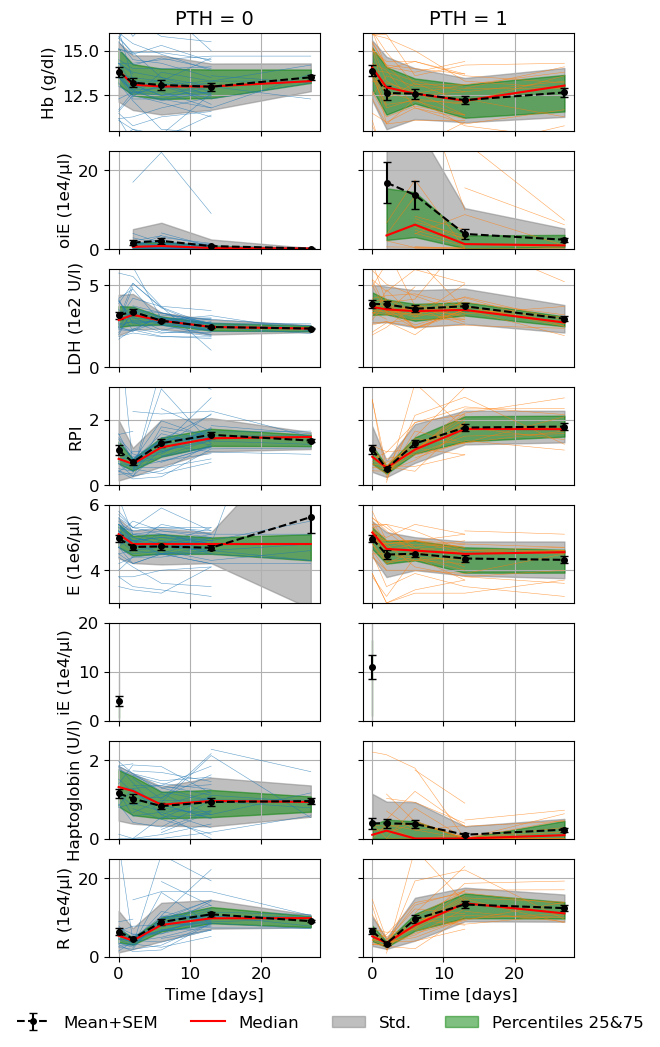

In [178]:
# Set rcParams for the desired font sizes
plt.rcParams['axes.titlesize'] = 14      # Title font size
plt.rcParams['axes.labelsize'] = 12      # Axis label font size
plt.rcParams['xtick.labelsize'] = 12     # X tick label font size
plt.rcParams['ytick.labelsize'] = 12     # Y tick label font size
plt.rcParams['legend.fontsize'] = 12     # Legend font size
plt.rcParams['legend.title_fontsize'] = 12 # Legend title font size
species_to_analyze = OrderedDict({
    'parasitemia' : ['parasitemia (%)', 1],
    'Hapto' : ['Haptoglobin (U/l)',1],
    'iE': ['iE (1e4/µl)', 1e4],
    'oiE': ['oiE (1e4/µl)', 1e4],
    'E': ['E (1e6/µl)', 1e6],
    'R': ['R (1e4/µl)', 1e4],
    'P': ['P (1e2/µl)', 1e2],
    'Hb': ['Hb (g/dl)', 1],
    'Hct': ['Hct', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (1e2 U/l)',1e2],
})
species=['Hb','oiE','LDH','RPI',
         'E','iE','Hapto','R',#'Hct'
         ]
feature_list = ['Hb','[oiE]', 'LDH', 'RPI',
                '[E]','[iE]','Hapto', '[R]', #'Hkt'
                ]    
fig , ax = plt.subplots(len(feature_list),2 , figsize = (6, 12), sharey='row', sharex='all')

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    for i in range(len(feature_list)):
        ax[i, pth].plot(patient_df['time'], patient_df[feature_list[i]]/species_to_analyze[species[i]][-1], label = patient, color=color, alpha=0.7, lw=0.4)
    

stats_order = ['Mean', 'Median', 'Std', 'Percentile_25', 'percentile_75', "SEM"]
color_list = ['black', 'red', 'grey', 'green', 'green', 'navy']

pth_stats =  [hb_pth_stats, oie_pth_stats,ldh_pth_stats, rpi_pth_stats,
              e_pth_stats, ie_pth_stats, hapto_pth_stats, r_pth_stats, hkt_pth_stats]  
non_pth_stats = [hb_non_pth_stats, oie_non_pth_stats, ldh_non_pth_stats, rpi_non_pth_stats, 
                  e_non_pth_stats, ie_non_pth_stats, hapto_non_pth_stats, r_non_pth_stats, hkt_non_pth_stats] 

for i in range(len(feature_list)):
    ax[i, 0].set_ylabel(species_to_analyze[species[i]][0])
    ax[i, 0].grid()
    ax[i, 1].grid()
    for j, name in enumerate(stats_order):
        if name in ['SEM','percentile_75']:continue

        k=-1 #std =2, sem =-1
        non_yerr = [non_pth_stats[i][k]/species_to_analyze[species[i]][-1], # 'down' error
                    non_pth_stats[i][k]/species_to_analyze[species[i]][-1]]  # 'up' error
        pth_yerr = [pth_stats[i][k]/species_to_analyze[species[i]][-1], # 'down' error
                    pth_stats[i][k]/species_to_analyze[species[i]][-1]]  # 'up' error
        if name =='Mean':
            ax[i,0].errorbar(patient_df['time'].unique(), non_pth_stats[i][j]/species_to_analyze[species[i]][-1], 
                             label = stats_order[j]+"+"+stats_order[k], color=color_list[j], alpha=1,
                             yerr=non_yerr, markersize=4, capsize=3, fmt="--o", ecolor = "black", rasterized=True)
            ax[i,1].errorbar(patient_df['time'].unique(), pth_stats[i][j]/species_to_analyze[species[i]][-1],
                             label = stats_order[j]+"+"+stats_order[k], color=color_list[j], alpha=1,
                             yerr=pth_yerr, markersize=4, capsize=3, fmt="--o", ecolor = "black", rasterized=True)
        elif name=='Percentile_25':
            ax[i, 0].fill_between(patient_df['time'].unique(),non_pth_stats[i][3]/species_to_analyze[species[i]][-1],
                                  non_pth_stats[i][4]/species_to_analyze[species[i]][-1],
                                  label = 'Percentiles 25&75', color=color_list[j], alpha=0.5)
            ax[i, 1].fill_between(patient_df['time'].unique(),pth_stats[i][3]/species_to_analyze[species[i]][-1],
                                  pth_stats[i][4]/species_to_analyze[species[i]][-1],
                                  label = 'Percentiles 25&75', color=color_list[j], alpha=0.5, rasterized=True)
            
        elif name=='Std':
            ax[i, 0].fill_between(patient_df['time'].unique(),
                                  (non_pth_stats[i][0]-non_pth_stats[i][2])/species_to_analyze[species[i]][-1],
                                  (non_pth_stats[i][0]+non_pth_stats[i][2])/species_to_analyze[species[i]][-1],
                                  label = 'Std.', color=color_list[j], alpha=0.5, rasterized=True)
            ax[i, 1].fill_between(patient_df['time'].unique(),
                                  (pth_stats[i][0]-pth_stats[i][2])/species_to_analyze[species[i]][-1],
                                  (pth_stats[i][0]+pth_stats[i][2])/species_to_analyze[species[i]][-1],
                                  label = 'Std.', color=color_list[j], alpha=0.5, rasterized=True)
        
        else:    
            ax[i, 0].plot(patient_df['time'].unique(),non_pth_stats[i][j]/species_to_analyze[species[i]][-1], 
                          label = stats_order[j], color=color_list[j], alpha=1, rasterized=True)
            ax[i, 1].plot(patient_df['time'].unique(), pth_stats[i][j]/species_to_analyze[species[i]][-1], 
                          label = stats_order[j], color=color_list[j], alpha=1, rasterized=True)

# ax[4, 0].plot(patient_df['time'].unique(), rpi_calc_non_pth, label = 'RPI_calc', color='navy')
# ax[4, 1].plot(patient_df['time'].unique(), rpi_calc_pth, label = 'RPI_calc', color='navy')

ax[-1, 0].set_xlabel('Time [days]')      
ax[-1, 1].set_xlabel('Time [days]')      

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

ax[0,0].set_ylim(10.5, 16.0)
ax[0,1].set_ylim(10.5, 16.0)    

ax[1,0].set_ylim(0, 2.5e1)
ax[1,1].set_ylim(0, 2.5e1)      

ax[2,0].set_ylim(0, 6)
ax[2,1].set_ylim(0, 6)  

ax[3,0].set_ylim(0, 3)
ax[3,1].set_ylim(0, 3)  

ax[4,0].set_ylim( 3e0, 6e0)
ax[4,1].set_ylim( 3e0, 6e0)      

ax[-3,0].set_ylim(0, 2e1)
ax[-3,1].set_ylim(0, 2e1)      

ax[-2,0].set_ylim( 0, 2.5e0)
ax[-2,1].set_ylim( 0, 2.5e0)      

ax[-1,0].set_ylim( 0, 2.5e1)
ax[-1,1].set_ylim( 0, 2.5e1)      

# ax[-1,0].set_ylim( 0.25, .5)
# ax[-1,1].set_ylim( 0.25, 0.5)      


handles, labels = ax[4, 0].get_legend_handles_labels()
ax[-1, -1].legend(handles[-1:]+handles[-4:-1],labels[-1:]+labels[-4:-1], ncol=4,
                  loc='lower right', bbox_to_anchor=(1.2, -0.9, 0.2, .9),frameon=False)

plt.savefig('figures/patient_data_viz/patient_data.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Clustering

In [90]:
def extract_patient_vector(data: pd.DataFrame, patient_id: int, features:list = ['Hb_norm', 'LDH_norm', 'Hapto_norm']) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    patient_vector = patient_df[features].values.T.flatten()
    return patient_vector

def stack_p_vectors(data: pd.DataFrame, features: list = ['Hb_norm', 'LDH_norm', 'Hapto_norm', 'oiE_percent_norm']) -> np.array:
    patient_vectors = []
    for patient in list_patients(data):
        patient_vector = extract_patient_vector(data, patient, features=features)
        patient_vectors.append(patient_vector)
    patient_vectors = np.array(patient_vectors)
    return patient_vectors  

In [91]:
n_data.columns

Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
       'Symptombeginn', 'Pittingquote_absolut_modified',
       'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
       'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
       'R_percent', '[R]', 'RPI', 'time', 'patient_id', 'Hb_norm', 'LDH_norm',
       'Hapto_norm', 'oiE_percent_norm', 'Hb_norm_ind', 'LDH_norm_ind',
       'Hapto_norm_ind', 'oiE_percent_norm_ind', 'Hb_minmax_ind',
       'LDH_minmax_ind', 'Hapto_minmax_ind', 'oiE_percent_minmax_ind',
       '[R]_minmax_ind', '[E]_minmax_ind'],
      dtype='object')

In [92]:
X = stack_p_vectors(n_data, features=['Hb_norm_ind', 'LDH_norm_ind', 'Hapto_norm_ind', 'oiE_percent_norm_ind','[R]_minmax_ind','PTH']) 

In [93]:
X.shape

(61, 30)

In [94]:
ic('Total number of non-NaN values in X:', X.shape[0] * X.shape[1])
ic('Number of non-NaN values in X:', np.count_nonzero(~np.isnan(X)))

ic| 'Total number of non-NaN values in X:': 'Total number of non-NaN values in X:'
    X.shape[0] * X.shape[1]: 1830
ic| 'Number of non-NaN values in X:': 'Number of non-NaN values in X:'
    np.count_nonzero(~np.isnan(X)): 1333


('Number of non-NaN values in X:', 1333)

In [95]:
percent_nan_per_feature = np.sum(np.isnan(X), axis=0) / X.shape[0]
percent_nan_per_feature

array([0.        , 0.        , 0.08196721, 0.        , 0.68852459,
       0.14754098, 0.06557377, 0.06557377, 0.01639344, 0.68852459,
       0.59016393, 0.36065574, 0.26229508, 0.21311475, 0.72131148,
       1.        , 0.47540984, 0.32786885, 0.26229508, 0.81967213,
       0.32786885, 0.2295082 , 0.09836066, 0.        , 0.70491803,
       0.        , 0.        , 0.        , 0.        , 0.        ])

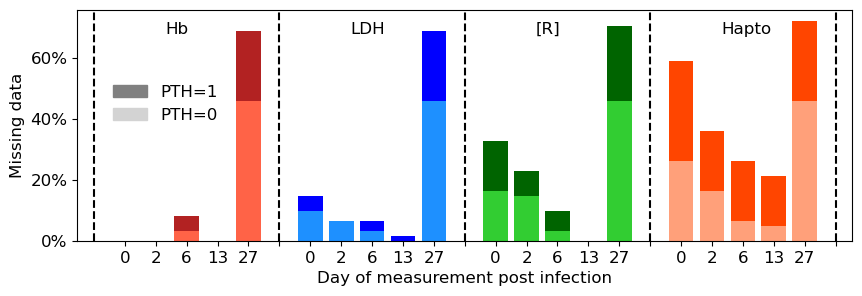

In [147]:

times = [0, 2, 6, 13, 27,'']
test = pd.DataFrame(X)
test = test.drop([26,27,28,29], axis=1)
# Create a stacked bar plot
pth = (test[test[25]==1].isna().sum())/61
non = (test[test[25]==0].isna().sum())/61
# Adjusting lengths for plotting purposes
non_adjusted = np.concatenate([non[:5], non[5:10], non[20:25], non[10:15]])
pth_adjusted = np.concatenate([pth[:5], pth[5:10],pth[20:25], pth[10:15], ])

# Plotting
fig, ax = plt.subplots(figsize=(10, 3))


# Define colors for each feature
colors_non = ['#FF6347', '#1E90FF', '#32CD32', '#FFA07A']
colors_pth = ['#B22222', '#0000FF', '#006400', '#FF4500']
#['#FF6347', '#1E90FF', '#32CD32', '#FFA07A']
#['#B22222', '#0000FF', '#006400', '#FF4500']

# Plot bars for each group, stacking 'pth' on top of 'non'
#bar_width = 0.8
#bar_spacing = 1.5
features = ['Hb', 'LDH', '[R]','Hapto', ]
# Calculate positions for bars
positions = np.arange(0, 24, 6)  # Position the groups of bars
for i, pos in enumerate(positions):
    # Plot 'non' bars
    ax.bar(pos + np.arange(5), non_adjusted[i*5:(i+1)*5],
           #label=f'{features[i]}',
           color=colors_non[i])
    # Plot 'pth' bars stacked on top of 'non'
    ax.bar(pos + np.arange(5), pth_adjusted[i*5:(i+1)*5], bottom=non_adjusted[i*5:(i+1)*5], 
           #label=f'{features[i]} PTH',
           color=colors_pth[i])
    ax.text(pos+1.3,0.68, s=f'{features[i]}', size=12)

# Vertical lines
for x in [-1, 5, 11, 17, 23]:
    ax.axvline(x, color='k', linestyle='--')

# Setting ticks and labels
ax.set_xticks(np.arange(0, 24))
ax.set_xticklabels(times * 4)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# Adding labels and title
ax.set_ylabel('Missing data')
ax.set_xlabel('Day of measurement post infection')
light_patch = mpatches.Patch(color='lightgrey', label='PTH=0')
dark_patch = mpatches.Patch(color='grey', label='PTH=1')
ax.legend(handles=[dark_patch, light_patch], frameon=False, bbox_to_anchor=[0.2,0.74])

# Display plot
plt.savefig('figures/patient_data_viz/missing_patient_data3.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [97]:
percent_nan_per_patient = np.sum(np.isnan(X), axis=1) / X.shape[1]  
ic(np.median(percent_nan_per_patient))
ic(np.where(percent_nan_per_patient <= np.median(percent_nan_per_patient)))
np.sum(percent_nan_per_patient <= np.median(percent_nan_per_patient))

ic| np.median(percent_nan_per_patient): 0.26666666666666666
ic| np.where(percent_nan_per_patient <= np.median(percent_nan_per_patient)): (array([ 3,  6, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 24, 25, 26, 27, 29,
                                                                                    31, 32, 34, 35, 38, 40, 41, 43, 44, 45, 46, 47, 52, 53, 55, 58]),)


33

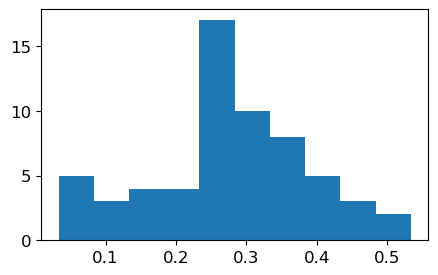

In [98]:
fig ,ax = plt.subplots(figsize = (5, 3))    

ax.hist(percent_nan_per_patient, bins=10)

plt.show()  

In [99]:
patients_to_keep = np.where(percent_nan_per_patient <= 0.35)[0] # 
X_reduced = X[patients_to_keep] 

# Use k-POD for Clustering

k-POD is Kmeans for sparse data [Here](https://arxiv.org/pdf/1411.7013.pdf).

In [100]:
# import the k_pod method
from kPOD import k_pod


In [101]:
# set the number of clusters desired (in this example, 3)
K = 7

# use previously existing data to perform clustering
clustering_results = k_pod(X_reduced, K)

# save the cluster assignments and centers
cluster_assignments = clustering_results[0]
cluster_centers = clustering_results[1]

ic(X_reduced.shape)

ic| X_reduced.shape: (43, 30)


(43, 30)

In [102]:
patients_to_keep, cluster_assignments

(array([ 3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 40, 41, 43, 44, 45, 46,
        47, 49, 50, 52, 53, 54, 55, 58, 59]),
 array([6., 1., 6., 3., 2., 3., 0., 4., 4., 0., 3., 3., 0., 5., 5., 0., 4.,
        1., 2., 3., 1., 0., 3., 2., 3., 0., 4., 4., 1., 3., 4., 5., 0., 4.,
        0., 0., 0., 0., 4., 2., 3., 3., 4.]))

In [103]:
cluster_assignments_full = -np.ones(len(n_data['patient_id'].unique()))
cluster_assignments_full[patients_to_keep] = cluster_assignments 
cluster_assignments_full


array([-1., -1., -1.,  6., -1., -1.,  1., -1.,  6.,  3.,  2.,  3.,  0.,
        4.,  4.,  0.,  3.,  3.,  0., -1., -1.,  5.,  5., -1.,  0.,  4.,
        1.,  2.,  3.,  1.,  0.,  3.,  2.,  3.,  0.,  4., -1., -1.,  4.,
       -1.,  1.,  3., -1.,  4.,  5.,  0.,  4.,  0., -1.,  0.,  0., -1.,
        0.,  4.,  2.,  3., -1., -1.,  3.,  4., -1.])

In [104]:
n_data['cluster'] = n_data.apply(lambda row: cluster_assignments_full[int(row['patient_id']) ], axis = 1) 

In [105]:
for p_id in list_patients(n_data):
    cluster = n_data[n_data['patient_id'] == p_id]['cluster'].values[0] 
    pth = n_data[n_data['patient_id'] == p_id]['PTH'].values[0] 
    ic(p_id, cluster, pth, cluster - pth)  


ic| p_id: 0.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 1.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 2.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 3.0, cluster: 6.0, pth: 0, cluster - pth: 6.0
ic| p_id: 4.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 5.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 6.0, cluster: 1.0, pth: 0, cluster - pth: 1.0
ic| p_id: 7.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 8.0, cluster: 6.0, pth: 0, cluster - pth: 6.0
ic| p_id: 9.0, cluster: 3.0, pth: 0, cluster - pth: 3.0
ic| p_id: 10.0, cluster: 2.0, pth: 1, cluster - pth: 1.0
ic| p_id: 11.0, cluster: 3.0, pth: 1, cluster - pth: 2.0
ic| p_id: 12.0, cluster: 0.0, pth: 1, cluster - pth: -1.0
ic| p_id: 13.0, cluster: 4.0, pth: 0, cluster - pth: 4.0
ic| p_id: 14.0, cluster: 4.0, pth: 0, cluster - pth: 4.0
ic| p_id: 15.0, cluster: 0.0, pth: 1, cluster - pth: -1.0
ic| p_id: 16.0, cluster: 3.0, pth: 0, cluster - pth: 3.0
ic| p_id: 17.0, cluster: 3.

In [106]:
data.columns

Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
       'Symptombeginn', 'Pittingquote_absolut_modified',
       'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
       'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
       'R_percent', '[R]', 'RPI', 'time', 'patient_id', 'Hb_norm', 'LDH_norm',
       'Hapto_norm', 'oiE_percent_norm', 'Hb_norm_ind', 'LDH_norm_ind',
       'Hapto_norm_ind', 'oiE_percent_norm_ind', 'Hb_minmax_ind',
       'LDH_minmax_ind', 'Hapto_minmax_ind', 'oiE_percent_minmax_ind',
       '[R]_minmax_ind', '[E]_minmax_ind', 'cluster'],
      dtype='object')

In [107]:
for cluster in data.cluster.unique():
    ic(cluster)
    ic(data[data["cluster"]==cluster]['Groups'].unique())
    ic(data[data["cluster"]==cluster]['PTH'].unique())

ic| cluster: -1.0
ic| data[data["cluster"]==cluster]['Groups'].unique(): array(['African, non-immune', 'African, semi-immune', 'Non-African', nan],
                                                             dtype=object)
ic| data[data["cluster"]==cluster]['PTH'].unique(): array([0, 1])
ic| cluster: 6.0
ic| data[data["cluster"]==cluster]['Groups'].unique(): array(['Non-African', 'African, non-immune'], dtype=object)
ic| data[data["cluster"]==cluster]['PTH'].unique(): array([0])
ic| cluster: 1.0
ic| data[data["cluster"]==cluster]['Groups'].unique(): array(['African, non-immune', 'African, semi-immune'], dtype=object)
ic| data[data["cluster"]==cluster]['PTH'].unique(): array([0])
ic| cluster: 3.0
ic| data[data["cluster"]==cluster]['Groups'].unique(): array(['African, non-immune', 'Non-African', 'African, semi-immune'],
                                                             dtype=object)
ic| data[data["cluster"]==cluster]['PTH'].unique(): array([0, 1])
ic| cluster: 2.0
ic| data[dat

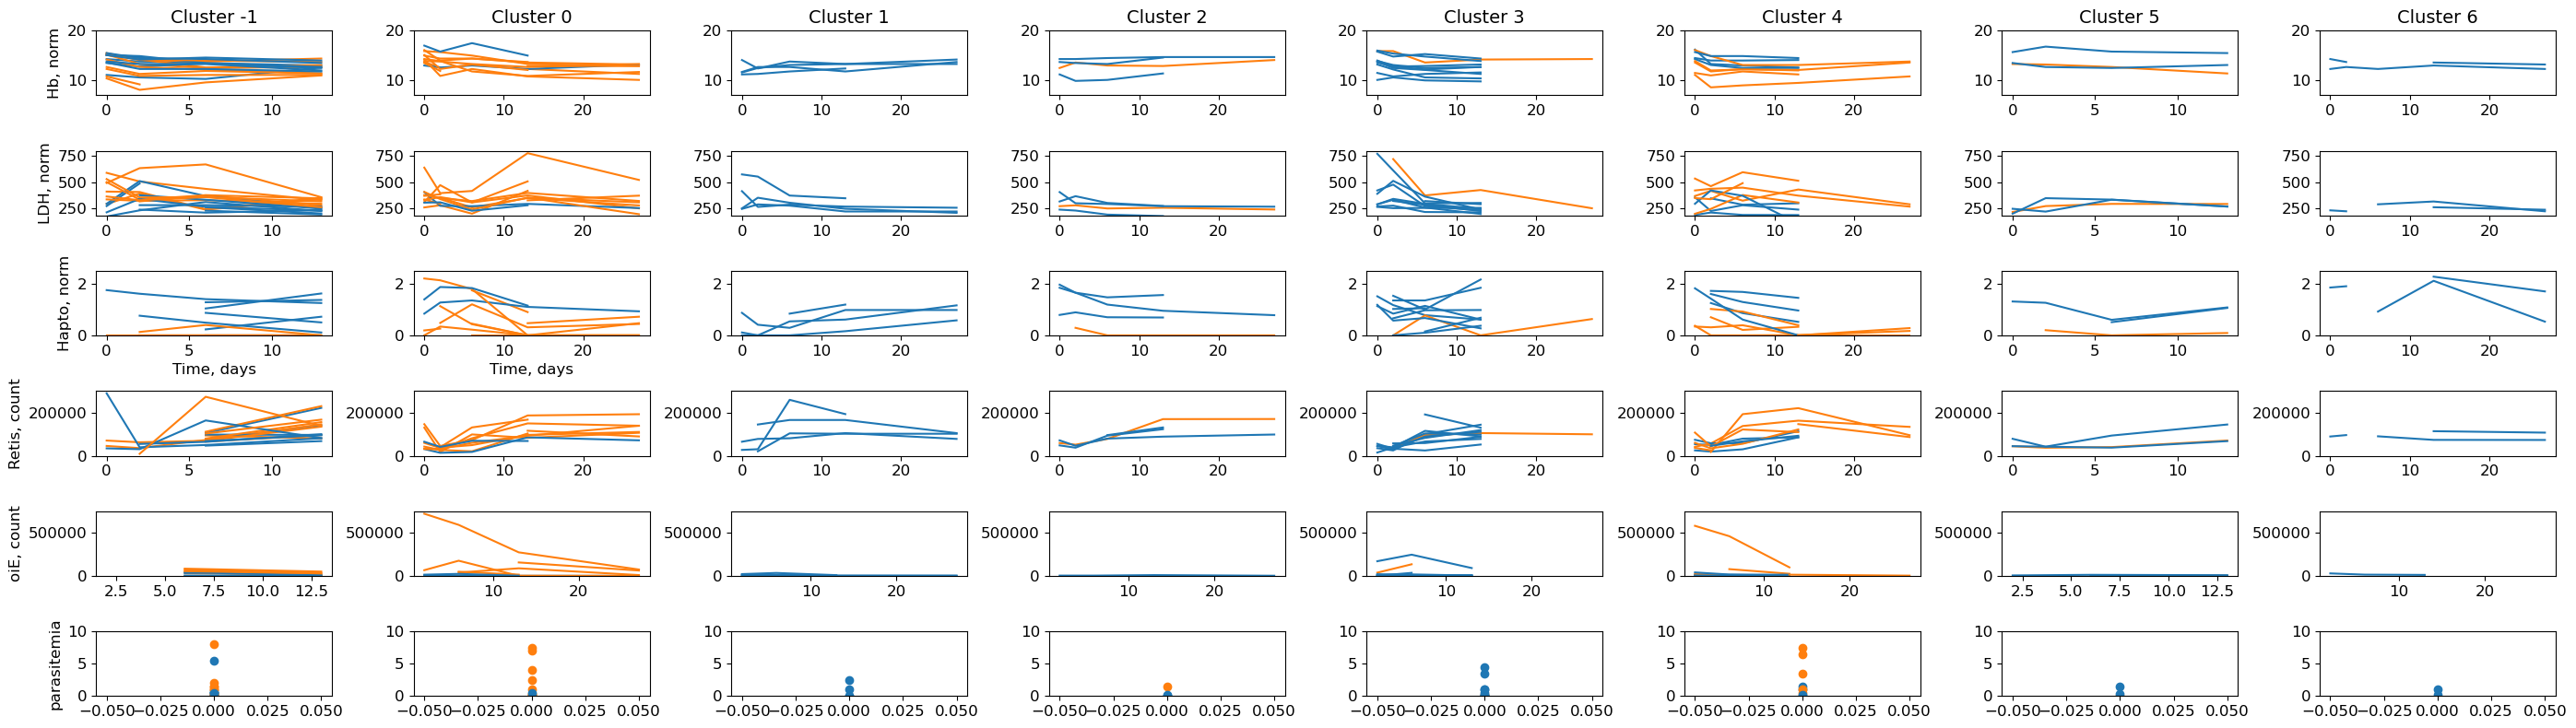

In [108]:
fig , ax = plt.subplots(6,K+1 , figsize = (4*K, 8))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    cluster = int(patient_df['cluster'].values[0])
    pth = int(patient_df['PTH'].values[0])

    col = cluster + 1 

    color = [f'C{i}' for i in range(K)][pth]
    ax[0,col].plot(patient_df['time'], patient_df['Hb'], label = patient, color=color)
    ax[1,col].plot(patient_df['time'], patient_df['LDH'], label = patient, color=color)
    ax[2,col].plot(patient_df['time'], patient_df['Hapto'], label = patient, color=color)
    ax[3,col].plot(patient_df['time'], patient_df['[R]'], label = patient, color=color)
    ax[4,col].plot(patient_df['time'], patient_df['[oiE]'], label = patient, color=color)
    ax[5,col].scatter(patient_df['time'], patient_df['parasitemia'], label = patient, color=color)

    ax[0,col].set_ylim(7, 20)
    ax[1,col].set_ylim(180, 800)
    ax[2,col].set_ylim(0, 2.5)
    ax[3,col].set_ylim(0, 3e5)
    ax[4,col].set_ylim(0, 7.5e5)
    ax[5, col].set_ylim(0, 10)

    ax[0, col].set_title(f'Cluster {cluster}')


ax[2, 0].set_xlabel('Time, days')  
ax[2, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm') 
ax[3, 0].set_ylabel('Retis, count')
ax[4, 0].set_ylabel('oiE, count')    
ax[5, 0].set_ylabel('parasitemia')    

plt.tight_layout()
plt.show()

In [109]:
def plot_patient(data: pd.DataFrame, patient_id: int, features:list = ['Hb_norm', 'LDH_norm', 'Hapto_norm']):
    patient_df = extract_patient(data, patient_id)
    fig , ax = plt.subplots(len(features),1 , figsize = (5, 3))
    for i, feature in enumerate(features):
        ax[i].plot(patient_df['time'], patient_df[feature], label = feature)
        ax[i].set_ylabel(feature)
    ax[len(features) - 1].set_xlabel('Time, days')      
   
    plt.tight_layout()
    plt.show()  

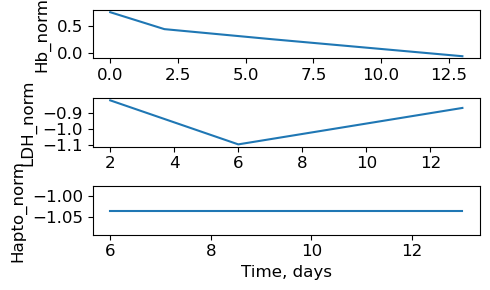

In [110]:
plot_patient(n_data, 1) 

In [111]:
n_data_drop = n_data.dropna(inplace=False)

In [112]:
n_data_drop

,patientnumber,malclass,PTH,age,sex,Ethnicity,Groups,Symptombeginn,Pittingquote_absolut_modified,Pittingquote_modified,...,LDH_norm_ind,Hapto_norm_ind,oiE_percent_norm_ind,Hb_minmax_ind,LDH_minmax_ind,Hapto_minmax_ind,oiE_percent_minmax_ind,[R]_minmax_ind,[E]_minmax_ind,cluster
